## Обучение предсказания границы дома

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import tensorflow as tf
import keras.backend.tensorflow_backend as KTF

def get_session(gpu_fraction=0.3):
    '''Assume that you have 6GB of GPU memory and want to allocate ~2GB'''

    num_threads = os.environ.get('OMP_NUM_THREADS')
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_fraction)

    if num_threads:
        return tf.Session(config=tf.ConfigProto(
            gpu_options=gpu_options, intra_op_parallelism_threads=num_threads))
    else:
        return tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


KTF.set_session(get_session())

Using TensorFlow backend.


In [3]:
!nvidia-smi

Sat Nov 18 22:06:07 2017       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.90                 Driver Version: 384.90                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   29C    P0    43W / 149W |   3519MiB / 11439MiB |      2%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import random
import copy

import datetime

from shutil import copyfile
import os
import json

In [5]:
DESCRIPTION = """Make a border prediction. 
Pretrain model from Experiment_2017_11_18_08 was used and then train on small lr=1e-5
Experiment_2017_11_18_09
"""

DATE = str(datetime.datetime.now())

DIR = './experiments/%s' % DATE

os.mkdir(DIR)

json.dump(DESCRIPTION, open(DIR + "/description.txt", "w"))
MODULES = ['dataset', 'unet', 'train_test_loader']

for m in MODULES:
    fname = "%s.py" % m
    copyfile(fname, DIR + '/' + fname)

[s, u, train_test_loader] = map(__import__, MODULES)

In [6]:
data_set = s.DataSet("./dataset/trainset", [s.ChannelPAN], image_size=(240,240), only_border=True)
ids = data_set.load()

train_ids, test_ids = train_test_loader.load_train_test()

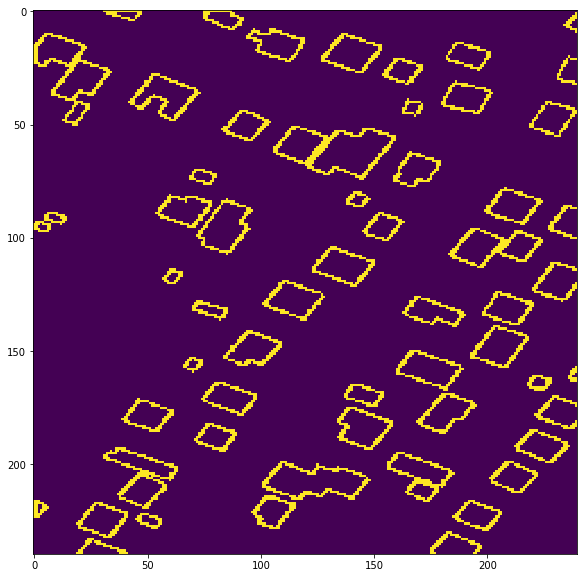

In [7]:
plt.figure(figsize=(10,10))
arr = data_set.get_mask(train_ids[3])
plt.imshow(arr)

In [16]:
net = u.UnetModel('classic-unet-border', data_set, DIR + "/model", lr=1e-5)

In [18]:
net.load_weights('./experiments/2017-11-18 19:47:12.325325/model/59')

In [17]:
net.u_history = json.load(open('./experiments/2017-11-18 19:47:12.325325/model/history.json', 'r'))

In [19]:
batch_generator = u.BatchGenerator(data_set, train_ids, random_rotate=True, shuffle_on_each_epoch=True)

In [20]:
net.train(batch_generator, epochs=60, batch_size=10)

epoch: 60, loss: 0.039085
epoch: 60, loss: 0.104175
epoch: 60, loss: 0.083343
epoch: 60, loss: 0.068057
epoch: 60, loss: 0.097348
epoch: 60, loss: 0.093281
epoch: 60, loss: 0.055290
epoch: 60, loss: 0.048933
epoch: 60, loss: 0.098716
epoch: 60, loss: 0.091990
epoch: 60, loss: 0.098295
epoch: 60, loss: 0.059878
epoch: 60, loss: 0.033652
epoch: 60, loss: 0.056606
epoch: 60, loss: 0.053053
epoch: 60, loss: 0.076847
epoch: 60, loss: 0.058224
epoch: 60, loss: 0.042489
epoch: 60, loss: 0.035849
epoch: 60, loss: 0.097773
epoch: 60, loss: 0.045176
epoch: 60, loss: 0.112744
epoch: 60, loss: 0.083854
epoch: 60, loss: 0.070188
epoch: 60, loss: 0.072202
epoch: 60, loss: 0.054221
epoch: 60, loss: 0.083538
epoch: 60, loss: 0.122438
epoch: 60, loss: 0.057015
epoch: 60, loss: 0.114865
epoch: 60, loss: 0.046611
epoch: 60, loss: 0.051239
epoch: 60, loss: 0.046047
epoch: 60, loss: 0.026840
epoch: 60, loss: 0.073373
epoch: 60, loss: 0.058156
epoch: 60, loss: 0.108308
epoch: 60, loss: 0.093124
epoch: 60, l

epoch: 64, loss: 0.057840
epoch: 64, loss: 0.112820
epoch: 64, loss: 0.048687
epoch: 64, loss: 0.072857
epoch: 64, loss: 0.068096
epoch: 64, loss: 0.068576
epoch: 64, loss: 0.066000
epoch: 64, loss: 0.091845
epoch: 64, loss: 0.046515
epoch: 65, loss: 0.076619
epoch: 65, loss: 0.040065
epoch: 65, loss: 0.080889
epoch: 65, loss: 0.099750
epoch: 65, loss: 0.065992
epoch: 65, loss: 0.069206
epoch: 65, loss: 0.052479
epoch: 65, loss: 0.107327
epoch: 65, loss: 0.094622
epoch: 65, loss: 0.078778
epoch: 65, loss: 0.054592
epoch: 65, loss: 0.064267
epoch: 65, loss: 0.095736
epoch: 65, loss: 0.043945
epoch: 65, loss: 0.055861
epoch: 65, loss: 0.049840
epoch: 65, loss: 0.063899
epoch: 65, loss: 0.078950
epoch: 65, loss: 0.054846
epoch: 65, loss: 0.127224
epoch: 65, loss: 0.053247
epoch: 65, loss: 0.065242
epoch: 65, loss: 0.065154
epoch: 65, loss: 0.076438
epoch: 65, loss: 0.031711
epoch: 65, loss: 0.054040
epoch: 65, loss: 0.071001
epoch: 65, loss: 0.099777
epoch: 65, loss: 0.061347
epoch: 65, l

epoch: 69, loss: 0.063799
epoch: 69, loss: 0.095981
epoch: 69, loss: 0.065704
epoch: 69, loss: 0.061790
epoch: 69, loss: 0.016346
epoch: 69, loss: 0.043410
epoch: 69, loss: 0.098824
epoch: 69, loss: 0.086769
epoch: 69, loss: 0.113229
epoch: 69, loss: 0.034785
epoch: 69, loss: 0.065912
epoch: 69, loss: 0.098266
epoch: 69, loss: 0.088884
epoch: 69, loss: 0.043598
epoch: 69, loss: 0.051908
epoch: 69, loss: 0.074763
epoch: 69, loss: 0.009744
epoch: 69, loss: 0.018111
epoch: 70, loss: 0.100708
epoch: 70, loss: 0.091655
epoch: 70, loss: 0.032379
epoch: 70, loss: 0.060111
epoch: 70, loss: 0.083904
epoch: 70, loss: 0.077747
epoch: 70, loss: 0.066570
epoch: 70, loss: 0.073887
epoch: 70, loss: 0.082189
epoch: 70, loss: 0.068905
epoch: 70, loss: 0.087044
epoch: 70, loss: 0.049558
epoch: 70, loss: 0.019402
epoch: 70, loss: 0.076620
epoch: 70, loss: 0.065401
epoch: 70, loss: 0.063346
epoch: 70, loss: 0.072822
epoch: 70, loss: 0.122195
epoch: 70, loss: 0.088761
epoch: 70, loss: 0.091612
epoch: 70, l

epoch: 74, loss: 0.041454
epoch: 74, loss: 0.073342
epoch: 74, loss: 0.054589
epoch: 74, loss: 0.031700
epoch: 74, loss: 0.067163
epoch: 74, loss: 0.049750
epoch: 74, loss: 0.078201
epoch: 74, loss: 0.038766
epoch: 74, loss: 0.037516
epoch: 74, loss: 0.040508
epoch: 74, loss: 0.099012
epoch: 74, loss: 0.067953
epoch: 74, loss: 0.032968
epoch: 74, loss: 0.077119
epoch: 74, loss: 0.084522
epoch: 74, loss: 0.075234
epoch: 74, loss: 0.087388
epoch: 74, loss: 0.039591
epoch: 74, loss: 0.045861
epoch: 74, loss: 0.104213
epoch: 74, loss: 0.035998
epoch: 74, loss: 0.072619
epoch: 74, loss: 0.086709
epoch: 74, loss: 0.034238
epoch: 74, loss: 0.072200
epoch: 74, loss: 0.064669
epoch: 74, loss: 0.140713
epoch: 75, loss: 0.071161
epoch: 75, loss: 0.064403
epoch: 75, loss: 0.084268
epoch: 75, loss: 0.081881
epoch: 75, loss: 0.044867
epoch: 75, loss: 0.075340
epoch: 75, loss: 0.056557
epoch: 75, loss: 0.065717
epoch: 75, loss: 0.047109
epoch: 75, loss: 0.043826
epoch: 75, loss: 0.081545
epoch: 75, l

epoch: 79, loss: 0.035843
epoch: 79, loss: 0.081621
epoch: 79, loss: 0.108055
epoch: 79, loss: 0.098695
epoch: 79, loss: 0.071215
epoch: 79, loss: 0.013303
epoch: 79, loss: 0.052966
epoch: 79, loss: 0.095138
epoch: 79, loss: 0.033801
epoch: 79, loss: 0.103825
epoch: 79, loss: 0.066056
epoch: 79, loss: 0.037988
epoch: 79, loss: 0.079168
epoch: 79, loss: 0.024626
epoch: 79, loss: 0.065681
epoch: 79, loss: 0.031532
epoch: 79, loss: 0.087640
epoch: 79, loss: 0.089921
epoch: 79, loss: 0.108864
epoch: 79, loss: 0.038251
epoch: 79, loss: 0.065398
epoch: 79, loss: 0.065314
epoch: 79, loss: 0.089119
epoch: 79, loss: 0.102371
epoch: 79, loss: 0.067769
epoch: 79, loss: 0.028654
epoch: 79, loss: 0.022430
epoch: 79, loss: 0.075255
epoch: 79, loss: 0.072901
epoch: 79, loss: 0.062695
epoch: 79, loss: 0.067472
epoch: 79, loss: 0.030084
epoch: 79, loss: 0.040909
epoch: 79, loss: 0.092274
epoch: 79, loss: 0.029051
epoch: 79, loss: 0.075842
epoch: 80, loss: 0.057132
epoch: 80, loss: 0.076079
epoch: 80, l

epoch: 84, loss: 0.106206
epoch: 84, loss: 0.043502
epoch: 84, loss: 0.033080
epoch: 84, loss: 0.068603
epoch: 84, loss: 0.050258
epoch: 84, loss: 0.057363
epoch: 84, loss: 0.068617
epoch: 84, loss: 0.072603
epoch: 84, loss: 0.059449
epoch: 84, loss: 0.053609
epoch: 84, loss: 0.074218
epoch: 84, loss: 0.057180
epoch: 84, loss: 0.088763
epoch: 84, loss: 0.013037
epoch: 84, loss: 0.089969
epoch: 84, loss: 0.079029
epoch: 84, loss: 0.045626
epoch: 84, loss: 0.046233
epoch: 84, loss: 0.016288
epoch: 84, loss: 0.041124
epoch: 84, loss: 0.073991
epoch: 84, loss: 0.103233
epoch: 84, loss: 0.081724
epoch: 84, loss: 0.056109
epoch: 84, loss: 0.046464
epoch: 84, loss: 0.054377
epoch: 84, loss: 0.064257
epoch: 84, loss: 0.062803
epoch: 84, loss: 0.085632
epoch: 84, loss: 0.069312
epoch: 84, loss: 0.069761
epoch: 84, loss: 0.077458
epoch: 84, loss: 0.047959
epoch: 84, loss: 0.059262
epoch: 84, loss: 0.057443
epoch: 84, loss: 0.069044
epoch: 84, loss: 0.054321
epoch: 84, loss: 0.037129
epoch: 84, l

epoch: 89, loss: 0.069622
epoch: 89, loss: 0.073261
epoch: 89, loss: 0.075612
epoch: 89, loss: 0.054226
epoch: 89, loss: 0.091719
epoch: 89, loss: 0.048527
epoch: 89, loss: 0.042588
epoch: 89, loss: 0.050561
epoch: 89, loss: 0.089576
epoch: 89, loss: 0.057169
epoch: 89, loss: 0.127451
epoch: 89, loss: 0.038524
epoch: 89, loss: 0.025199
epoch: 89, loss: 0.084025
epoch: 89, loss: 0.071122
epoch: 89, loss: 0.044696
epoch: 89, loss: 0.081899
epoch: 89, loss: 0.101514
epoch: 89, loss: 0.035303
epoch: 89, loss: 0.054838
epoch: 89, loss: 0.084350
epoch: 89, loss: 0.049941
epoch: 89, loss: 0.081568
epoch: 89, loss: 0.097808
epoch: 89, loss: 0.031880
epoch: 89, loss: 0.060222
epoch: 89, loss: 0.058902
epoch: 89, loss: 0.056897
epoch: 89, loss: 0.075928
epoch: 89, loss: 0.015956
epoch: 89, loss: 0.057792
epoch: 89, loss: 0.048537
epoch: 89, loss: 0.033198
epoch: 89, loss: 0.036118
epoch: 89, loss: 0.049839
epoch: 89, loss: 0.064920
epoch: 89, loss: 0.048695
epoch: 89, loss: 0.060382
epoch: 89, l

epoch: 94, loss: 0.078191
epoch: 94, loss: 0.051982
epoch: 94, loss: 0.037050
epoch: 94, loss: 0.052676
epoch: 94, loss: 0.054880
epoch: 94, loss: 0.030558
epoch: 94, loss: 0.040267
epoch: 94, loss: 0.041772
epoch: 94, loss: 0.009122
epoch: 94, loss: 0.074892
epoch: 94, loss: 0.088349
epoch: 94, loss: 0.033126
epoch: 94, loss: 0.030864
epoch: 94, loss: 0.061576
epoch: 94, loss: 0.071201
epoch: 94, loss: 0.079101
epoch: 94, loss: 0.041494
epoch: 94, loss: 0.037197
epoch: 94, loss: 0.086935
epoch: 94, loss: 0.076637
epoch: 94, loss: 0.044043
epoch: 94, loss: 0.067064
epoch: 94, loss: 0.059056
epoch: 94, loss: 0.073844
epoch: 94, loss: 0.098863
epoch: 94, loss: 0.098799
epoch: 94, loss: 0.060557
epoch: 94, loss: 0.049950
epoch: 94, loss: 0.045055
epoch: 94, loss: 0.062117
epoch: 94, loss: 0.052280
epoch: 94, loss: 0.084568
epoch: 94, loss: 0.037668
epoch: 94, loss: 0.054405
epoch: 94, loss: 0.072546
epoch: 94, loss: 0.029680
epoch: 94, loss: 0.062563
epoch: 94, loss: 0.040360
epoch: 94, l

epoch: 98, loss: 0.069667
epoch: 98, loss: 0.043502
epoch: 98, loss: 0.069040
epoch: 98, loss: 0.043966
epoch: 98, loss: 0.084343
epoch: 98, loss: 0.121834
epoch: 98, loss: 0.088629
epoch: 99, loss: 0.021391
epoch: 99, loss: 0.045397
epoch: 99, loss: 0.046863
epoch: 99, loss: 0.109709
epoch: 99, loss: 0.052264
epoch: 99, loss: 0.069451
epoch: 99, loss: 0.090485
epoch: 99, loss: 0.058171
epoch: 99, loss: 0.048935
epoch: 99, loss: 0.042702
epoch: 99, loss: 0.065277
epoch: 99, loss: 0.076686
epoch: 99, loss: 0.048567
epoch: 99, loss: 0.092501
epoch: 99, loss: 0.060158
epoch: 99, loss: 0.075292
epoch: 99, loss: 0.060983
epoch: 99, loss: 0.021943
epoch: 99, loss: 0.054416
epoch: 99, loss: 0.043328
epoch: 99, loss: 0.038853
epoch: 99, loss: 0.053222
epoch: 99, loss: 0.098898
epoch: 99, loss: 0.054082
epoch: 99, loss: 0.064656
epoch: 99, loss: 0.061187
epoch: 99, loss: 0.083453
epoch: 99, loss: 0.078973
epoch: 99, loss: 0.026676
epoch: 99, loss: 0.092990
epoch: 99, loss: 0.026784
epoch: 99, l

epoch: 103, loss: 0.068565
epoch: 103, loss: 0.052619
epoch: 103, loss: 0.062645
epoch: 103, loss: 0.033473
epoch: 103, loss: 0.054428
epoch: 103, loss: 0.045935
epoch: 103, loss: 0.091990
epoch: 103, loss: 0.045368
epoch: 103, loss: 0.095603
epoch: 103, loss: 0.039077
epoch: 103, loss: 0.037601
epoch: 103, loss: 0.019249
epoch: 103, loss: 0.073561
epoch: 103, loss: 0.054193
epoch: 103, loss: 0.050396
epoch: 103, loss: 0.070714
epoch: 103, loss: 0.056523
epoch: 103, loss: 0.043246
epoch: 103, loss: 0.101566
epoch: 103, loss: 0.040476
epoch: 103, loss: 0.103537
epoch: 103, loss: 0.061129
epoch: 103, loss: 0.058268
epoch: 103, loss: 0.107280
epoch: 103, loss: 0.028687
epoch: 104, loss: 0.072579
epoch: 104, loss: 0.017362
epoch: 104, loss: 0.092171
epoch: 104, loss: 0.059692
epoch: 104, loss: 0.079950
epoch: 104, loss: 0.052610
epoch: 104, loss: 0.028319
epoch: 104, loss: 0.024860
epoch: 104, loss: 0.049911
epoch: 104, loss: 0.052888
epoch: 104, loss: 0.090522
epoch: 104, loss: 0.067828
e

epoch: 108, loss: 0.084116
epoch: 108, loss: 0.039261
epoch: 108, loss: 0.042201
epoch: 108, loss: 0.018711
epoch: 108, loss: 0.037746
epoch: 108, loss: 0.045063
epoch: 108, loss: 0.077394
epoch: 108, loss: 0.076621
epoch: 108, loss: 0.028814
epoch: 108, loss: 0.048453
epoch: 108, loss: 0.056732
epoch: 108, loss: 0.064152
epoch: 108, loss: 0.069630
epoch: 108, loss: 0.050384
epoch: 108, loss: 0.023369
epoch: 108, loss: 0.104833
epoch: 108, loss: 0.047454
epoch: 108, loss: 0.080246
epoch: 108, loss: 0.034674
epoch: 108, loss: 0.007676
epoch: 108, loss: 0.034716
epoch: 108, loss: 0.043220
epoch: 108, loss: 0.068117
epoch: 108, loss: 0.040491
epoch: 108, loss: 0.053395
epoch: 108, loss: 0.072538
epoch: 108, loss: 0.092249
epoch: 108, loss: 0.020343
epoch: 108, loss: 0.087086
epoch: 108, loss: 0.071566
epoch: 108, loss: 0.060095
epoch: 108, loss: 0.021275
epoch: 108, loss: 0.031793
epoch: 108, loss: 0.084812
epoch: 108, loss: 0.075726
epoch: 108, loss: 0.040721
epoch: 108, loss: 0.049394
e

epoch: 112, loss: 0.071389
epoch: 112, loss: 0.102086
epoch: 113, loss: 0.060148
epoch: 113, loss: 0.059926
epoch: 113, loss: 0.039377
epoch: 113, loss: 0.095019
epoch: 113, loss: 0.025412
epoch: 113, loss: 0.019710
epoch: 113, loss: 0.035913
epoch: 113, loss: 0.071717
epoch: 113, loss: 0.069212
epoch: 113, loss: 0.036441
epoch: 113, loss: 0.034927
epoch: 113, loss: 0.054551
epoch: 113, loss: 0.097717
epoch: 113, loss: 0.073893
epoch: 113, loss: 0.018879
epoch: 113, loss: 0.064430
epoch: 113, loss: 0.028273
epoch: 113, loss: 0.082482
epoch: 113, loss: 0.030672
epoch: 113, loss: 0.088691
epoch: 113, loss: 0.047429
epoch: 113, loss: 0.090350
epoch: 113, loss: 0.014191
epoch: 113, loss: 0.097795
epoch: 113, loss: 0.031624
epoch: 113, loss: 0.012570
epoch: 113, loss: 0.099249
epoch: 113, loss: 0.091462
epoch: 113, loss: 0.017798
epoch: 113, loss: 0.024437
epoch: 113, loss: 0.058699
epoch: 113, loss: 0.052793
epoch: 113, loss: 0.113160
epoch: 113, loss: 0.051309
epoch: 113, loss: 0.058686
e

epoch: 117, loss: 0.061975
epoch: 117, loss: 0.035693
epoch: 117, loss: 0.071894
epoch: 117, loss: 0.053768
epoch: 117, loss: 0.056753
epoch: 117, loss: 0.038030
epoch: 117, loss: 0.042251
epoch: 117, loss: 0.033052
epoch: 117, loss: 0.073653
epoch: 117, loss: 0.054512
epoch: 117, loss: 0.082015
epoch: 117, loss: 0.083591
epoch: 117, loss: 0.017490
epoch: 117, loss: 0.051620
epoch: 117, loss: 0.040269
epoch: 117, loss: 0.048523
epoch: 117, loss: 0.038950
epoch: 117, loss: 0.028279
epoch: 117, loss: 0.080506
epoch: 117, loss: 0.074634
epoch: 117, loss: 0.110706
epoch: 117, loss: 0.036166
epoch: 117, loss: 0.053247
epoch: 118, loss: 0.076538
epoch: 118, loss: 0.050498
epoch: 118, loss: 0.052289
epoch: 118, loss: 0.052986
epoch: 118, loss: 0.068356
epoch: 118, loss: 0.042004
epoch: 118, loss: 0.044752
epoch: 118, loss: 0.025033
epoch: 118, loss: 0.017856
epoch: 118, loss: 0.081609
epoch: 118, loss: 0.019355
epoch: 118, loss: 0.032764
epoch: 118, loss: 0.078703
epoch: 118, loss: 0.009576
e